<a href="https://colab.research.google.com/github/AI4ChemS/CHE-1147/blob/main/tutorials/tutorial_02_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why Linear Algebra Matters for ML

Machine learning models are built on **linear algebra**.  
Almost everything we do with data involves vectors and matrices:

- **Data as vectors:**  
  Each sample = a vector of features  
  (e.g., a molecule described by [MW, boiling point, density]).

- **Datasets as matrices:**  
  Rows = samples, Columns = features.  
  Example: 100 molecules × 10 properties → a 100×10 matrix.

- **Model parameters as matrices:**  
  Linear regression, neural networks, PCA, and embeddings all rely on matrix multiplications.

- **Optimization:**  
  Norms and dot products define distances and similarities.  
  Eigenvectors and SVD power dimensionality reduction.

👉 By reviewing a few essentials, you’ll be able to:  
- Understand ML math notation quickly.  
- Write correct and efficient NumPy code.  
- Connect concepts (e.g., regression = solving linear systems, PCA = eigen decomposition).


# 1. Vectors

A **vector** is just an ordered list of numbers.  
- In math: column of numbers  
- In ML: often represents a **feature vector** (properties of a sample)

Example: A molecule described by three features  
$$
  \text{CO₂} = [\text{MW}, \text{Boiling Point}, \text{Density}]
$$


In [1]:
import numpy as np

# Example: feature vector for CO2
co2 = np.array([44.01, -78.5, 1.98])   # MW, boiling point (°C), density (g/L)
print("CO2 vector:", co2)
print("Shape:", co2.shape)


CO2 vector: [ 44.01 -78.5    1.98]
Shape: (3,)


In [2]:
# Another molecule: H2O
h2o = np.array([18.02, 100.0, 0.997])

# Vector addition (elementwise)
print("CO2 + H2O:", co2 + h2o)

# Scalar multiplication
print("2 * CO2:", 2 * co2)


CO2 + H2O: [62.03  21.5    2.977]
2 * CO2: [  88.02 -157.      3.96]


- **Addition** → combining feature contributions  
- **Scalar multiplication** → rescaling all features (like changing units)  

👉 In ML, vectors represent **data points**.  
A dataset = collection of vectors stacked into a matrix.


### Mini Exercise

1. Create a vector for methane (CH₄): `[16.04, -161.5, 0.717]`.  
2. Add it to the CO₂ vector. What does the result mean?  
3. Multiply the H₂O vector by 0.5. Interpret the result (half the feature values).


# 2. Dot Product & Norms

These two concepts are the backbone of ML:

- **Dot product:** measures alignment/similarity of two vectors.  
- **Norm:** measures the length (magnitude) of a vector.

They show up in:
- Cosine similarity (used in embeddings, recommendation systems).  
- Distances between data points.  
- Optimization (gradient descent steps use vector norms).


In [4]:
import numpy as np

# Feature vectors for two molecules
co2 = np.array([44.01, -78.5, 1.98])   # MW, BP, density
h2o = np.array([18.02, 100.0, 0.997])

# Dot product
dot = np.dot(co2, h2o)
print("Dot product:", dot)


Dot product: -7054.965740000001


The dot product is the sum of elementwise multiplications:

$$
\mathbf{a}\cdot\mathbf{b}=\sum_{i=1}^{n} a_i\,b_i
$$


- Large positive → vectors point in similar directions.  
- Near zero → vectors are orthogonal (unrelated).  
- Negative → vectors point in opposite directions.


In [5]:
# L2 norm (Euclidean length)
norm_co2 = np.linalg.norm(co2)
print("‖CO2‖ (L2 norm):", norm_co2)

# L1 norm (sum of absolute values)
norm_co2_L1 = np.linalg.norm(co2, ord=1)
print("‖CO2‖ (L1 norm):", norm_co2_L1)


‖CO2‖ (L2 norm): 90.01694562692072
‖CO2‖ (L1 norm): 124.49


- **L2 norm:** usual Euclidean distance (length of vector).  
- **L1 norm:** sum of absolute values, often used for sparsity (e.g., Lasso regression).  

In ML:
- Norms measure the size of weights (regularization).  
- Norms measure distances between feature vectors.


In [7]:
# Cosine similarity = dot(a, b) / (‖a‖‖b‖)
cos_sim = np.dot(co2, h2o) / (np.linalg.norm(co2) * np.linalg.norm(h2o))
print("Cosine similarity (CO2 vs H2O):", cos_sim)


Cosine similarity (CO2 vs H2O): -0.7712773573100061


Cosine similarity measures the **angle** between vectors.  
- 1 = pointing in the same direction (very similar).  
- 0 = orthogonal (no relation).  
- -1 = opposite directions.  

👉 In ML, cosine similarity is used for:
- Word embeddings (NLP)  
- Chemical/material embeddings  
- Nearest-neighbor search


### Mini Exercise

1. Create a vector for methane: `[16.04, -161.5, 0.717]`.  
2. Compute:
   - Dot product with CO₂.  
   - L2 norm.  
   - Cosine similarity with H₂O.  
3. Interpret the results: what does similarity mean in this feature space?


# 3. Matrices

A **matrix** is a 2D collection of numbers.  
- In ML: rows = samples, columns = features.  
- Example: dataset of molecules with 3 properties each → a matrix.

Notation:
- Vector = 1D array (shape `(n,)`)  
- Matrix = 2D array (shape `(m, n)`)  


In [8]:
import numpy as np

# Each row = [MW, Boiling Point, Density]
data = np.array([
    [44.01, -78.5, 1.98],   # CO2
    [18.02, 100.0, 0.997],  # H2O
    [16.04, -161.5, 0.717], # CH4
    [32.00, -183.0, 1.429]  # O2
])

print("Dataset matrix:\n", data)
print("Shape:", data.shape)   # 4 samples × 3 features


Dataset matrix:
 [[  44.01   -78.5      1.98 ]
 [  18.02   100.       0.997]
 [  16.04  -161.5      0.717]
 [  32.    -183.       1.429]]
Shape: (4, 3)


In [11]:
# Indexing & slicing

# First row (CO2 vector)
print("CO2:", data[0])

# First column (all MWs)
print("Molecular weights:", data[:, 0])

# Submatrix: first 2 molecules, first 2 features
print("Submatrix:\n", data[0:2, 0:2])


CO2: [ 44.01 -78.5    1.98]
Molecular weights: [44.01 18.02 16.04 32.  ]
Submatrix:
 [[ 44.01 -78.5 ]
 [ 18.02 100.  ]]


In [10]:
# Transpose swaps rows and columns
print("Original shape:", data.shape)
print("Transpose shape:", data.T.shape)

Original shape: (4, 3)
Transpose shape: (3, 4)


👉 Transpose is common in ML when we switch between:
- Data in **row-major form** (samples = rows).  
- Weight matrices that expect column vectors.  


- **Row** = one molecule’s feature vector.  
- **Column** = one property across all molecules.

This dual view is why matrix algebra is so central:  
- Operations can apply across rows (samples) or columns (features).


### Mini Exercise

1. Print the boiling points column (2nd column).  
2. What is the average boiling point?  
3. Extract the submatrix of `[MW, Density]` for H2O and CH4 only.  


# 4. Matrix Multiplication

Matrix multiplication is everywhere in ML:
- Linear regression → predictions = `X @ w`
- Neural networks → layer outputs = `X @ W + b`
- PCA → projecting data onto principal components

**Rule:** To multiply `A (m × n)` and `B (n × p)`,  
the inner dimensions must match (`n` = `n`), result is `m × p`.


In [12]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

print("A:\n", A)
print("B:\n", B)

# Matrix multiplication
C = A @ B   # same as np.dot(A, B)
print("A @ B:\n", C)


A:
 [[1 2]
 [3 4]]
B:
 [[5 6]
 [7 8]]
A @ B:
 [[19 22]
 [43 50]]


In [13]:
# Dataset: rows = molecules, cols = features
X = np.array([
    [44.01, -78.5, 1.98],   # CO2
    [18.02, 100.0, 0.997],  # H2O
    [16.04, -161.5, 0.717], # CH4
    [32.00, -183.0, 1.429]  # O2
])

# Weight vector (3 features → 1 output)
w = np.array([0.01, 0.05, 2.0])

# Prediction = X @ w
y_pred = X @ w
print("Predictions:", y_pred)


Predictions: [ 0.4751  7.1742 -6.4806 -5.972 ]


Here:
- `X` = data matrix (molecules × features)  
- `w` = weight vector (features → output)  
- `X @ w` = linear model predictions  

👉 This is exactly what happens in **linear regression** and in every layer of a neural network.


In [14]:
# Suppose we predict 2 different properties
W = np.array([
    [0.01, 0.02],   # feature 1 weights
    [0.05, -0.03],  # feature 2 weights
    [2.0, 1.0]      # feature 3 weights
])

Y_pred = X @ W
print("Predictions (4 samples × 2 outputs):\n", Y_pred)


Predictions (4 samples × 2 outputs):
 [[ 0.4751  5.2152]
 [ 7.1742 -1.6426]
 [-6.4806  5.8828]
 [-5.972   7.559 ]]


👉 Each column of `Y_pred` is a different predicted property.  
This is how neural nets handle **multi-output prediction**.


# 5. Linear Systems (Ax = b)

Many ML problems boil down to solving a system of linear equations:

\[
A x = b
\]

- **A** = matrix (data or coefficients)  
- **x** = unknown vector (parameters/weights)  
- **b** = output vector (observations)

Examples in ML:
- Linear regression (solving for weights that best fit data).  
- Least squares (finding the best approximate solution when the system doesn’t have an exact solution).


In [15]:
import numpy as np

# Solve:
# 2x + y = 5
# x - y = 1

A = np.array([[2, 1],
              [1, -1]])
b = np.array([5, 1])

x = np.linalg.solve(A, b)
print("Solution [x, y]:", x)


Solution [x, y]: [2. 1.]


In [16]:
# Example: more equations than unknowns
A = np.array([[1, 1],
              [1, 2],
              [1, 3]])
b = np.array([1, 2, 2.5])

# Least squares solution (linear regression style)
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
print("Best-fit solution [intercept, slope]:", x)


Best-fit solution [intercept, slope]: [0.33333333 0.75      ]


👉 This is exactly what happens in **linear regression**:  
- `A` = design matrix (features)  
- `x` = weights (parameters)  
- `b` = observed outputs  


In [17]:
# Dataset: simple 1D input
X = np.array([[1, 1],
              [1, 2],
              [1, 3],
              [1, 4]])
y = np.array([1, 2, 2.5, 4])

# Solve for linear regression coefficients
beta, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
print("Linear regression coefficients [intercept, slope]:", beta)


Linear regression coefficients [intercept, slope]: [6.4220175e-16 9.5000000e-01]


### Mini Exercise

1. Solve the system:
   - 3x + y = 9
   - 2x - y = 8  

2. Construct a dataset with inputs `[1, 2, 3, 4, 5]` and outputs `[2, 3, 4.5, 6, 7.5]`.  
   - Build the design matrix `X` with a bias column of ones.  
   - Use `np.linalg.lstsq` to fit a linear regression model.  
   - What are the slope and intercept?  


In [ ]:
%pip install ipywidgets
from ipywidgets import interact, FloatSlider, VBox, HBox
import numpy as np
import matplotlib.pyplot as plt

Linear systems — slide A, b; see line intersection (solution)

In [ ]:
@interact(
    a11=FloatSlider(min=-5, max=2, step=0.1, value=2, description="a₁₁"),
    a12=FloatSlider(min=-5, max=1, step=0.1, value=1, description="a₁₂"),
    a21=FloatSlider(min=-5, max=1, step=0.1, value=1, description="a₂₁"),
    a22=FloatSlider(min=-5, max=-1, step=0.1, value=-1, description="a₂₂"),
    b1=FloatSlider(min=-10, max=4, step=0.1, value=4, description="b₁"),
    b2=FloatSlider(min=-10, max=1, step=0.1, value=1, description="b₂"),
)
def solve_2x2(a11, a12, a21, a22, b1, b2):
    A = np.array([[a11, a12], [a21, a22]])
    b = np.array([b1, b2])
    x = None
    try:
        x = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        pass

    xs = np.linspace(-10, 10, 400)

    def line(a, b, c):
        return (c - a * xs) / b if b != 0 else np.full_like(xs, np.nan)

    y1 = line(a11, a12, b1)
    y2 = line(a21, a22, b2)

    plt.figure()
    plt.plot(xs, y1, label="a₁₁x + a₁₂y = b₁")
    plt.plot(xs, y2, label="a₂₁x + a₂₂y = b₂")

    if x is not None and np.all(np.isfinite(x)):
        plt.plot([x[0]], [x[1]], marker="o", markersize=8, color="red")
        ttl = f"Unique solution: ({x[0]:.2f}, {x[1]:.2f})"
    else:
        ttl = "No unique solution (parallel or dependent lines)"

    plt.axhline(0, alpha=0.3)
    plt.axvline(0, alpha=0.3)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.gca().set_aspect("equal", "box")
    plt.legend()
    plt.title(ttl)
    plt.show()


# 6. Determinant & Inverse

These concepts tell us whether a matrix is "invertible" (non-singular).

- **Determinant (det A):**
  - If det(A) = 0 → matrix is singular (no unique solution).
  - If det(A) ≠ 0 → matrix is invertible.

- **Inverse (A⁻¹):**
  - Solves `A x = b` as `x = A⁻¹ b`.
  - In ML, we rarely compute the inverse directly (unstable, slow).
  - Instead, we use numerical solvers (`np.linalg.solve` or `np.linalg.lstsq`).


In [18]:
import numpy as np

A = np.array([[2, 3],
              [1, 4]])

detA = np.linalg.det(A)
print("Determinant of A:", detA)


Determinant of A: 5.000000000000001


In [19]:
# Compute inverse
A_inv = np.linalg.inv(A)
print("Inverse of A:\n", A_inv)

# Verify: A @ A_inv ≈ Identity
I = A @ A_inv
print("A @ A_inv:\n", I)


Inverse of A:
 [[ 0.8 -0.6]
 [-0.2  0.4]]
A @ A_inv:
 [[ 1.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00  1.00000000e+00]]


⚠️ In ML:
- Don’t compute `A⁻¹` directly for regression (numerical instability).
- Use **solvers** instead:
  - `np.linalg.solve(A, b)` for exact systems
  - `np.linalg.lstsq(A, b)` for least squares

👉 But knowing about determinants & inverses helps understand why some problems have no unique solution.


### Mini Exercise

1. Compute the determinant of:

$$
B = \begin{bmatrix} 1 & 2 \\ 2 & 4 \end{bmatrix}
$$

What does it tell you about invertibility?

2. Try calling `np.linalg.inv(B)`. What happens?


# 7. Eigenvalues, Eigenvectors & PCA

Core idea: some directions **don’t rotate** under a linear transform, they only **scale**.

$$
A\mathbf v = \lambda \mathbf v
$$

- $\mathbf v$ is an **eigenvector** of $A$
- $\lambda$ is the corresponding **eigenvalue**

In ML:
- **Covariance matrices** have eigenvectors that point along directions of maximum variance.
- **PCA** keeps the top-variance directions to compress data with minimal information loss.


In [20]:
import numpy as np

# Toy 2D dataset (rows = samples, cols = features)
# Example: [feature_1, feature_2] for 6 samples
X = np.array([
    [2.0, 1.0],
    [2.2, 1.3],
    [2.9, 2.7],
    [3.1, 2.9],
    [3.0, 2.4],
    [2.7, 2.2],
])

# Center the data (zero-mean per feature)
Xc = X - X.mean(axis=0)
Xc[:3], Xc.shape


(array([[-0.65      , -1.08333333],
        [-0.45      , -0.78333333],
        [ 0.25      ,  0.61666667]]),
 (6, 2))

For PCA, compute the **covariance matrix** of centered data and take its eigenpairs.

- Covariance (for centered $X_c$): $C = \frac{1}{n-1} X_c^\top X_c$
- Use `np.linalg.eigh` (for symmetric matrices like covariance).


In [21]:
# Covariance matrix
C = np.cov(Xc, rowvar=False)

# Eigen-decomposition (symmetric): returns ascending eigenvalues
eigvals, eigvecs = np.linalg.eigh(C)

# Sort by descending eigenvalue
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

explained_var_ratio = eigvals / eigvals.sum()

eigvals, explained_var_ratio, eigvecs


(array([0.78658809, 0.00607857]),
 array([0.99233149, 0.00766851]),
 array([[ 0.5022933 , -0.86469731],
        [ 0.86469731,  0.5022933 ]]))

Project data onto principal components:

$$
Z = X_c W
$$

where columns of $W$ are the top-$k$ eigenvectors.


In [22]:
# Project onto all PCs (here 2D → 2 PCs)
Z = Xc @ eigvecs   # scores in PC space

# Keep only the first principal component
Z1 = Z[:, [0]]     # (n, 1)
# Reconstruct rank-1 approximation in original space
X_approx = Z1 @ eigvecs[:, [0]].T

explained_var_ratio, Z[:3], X_approx[:3]


(array([0.99233149, 0.00766851]),
 array([[-1.26324607,  0.01790218],
        [-0.90337821, -0.00434929],
        [ 0.65880333,  0.09357321]]),
 array([[-0.63452003, -1.09232548],
        [-0.45376082, -0.78114871],
        [ 0.3309125 ,  0.56966547]]))

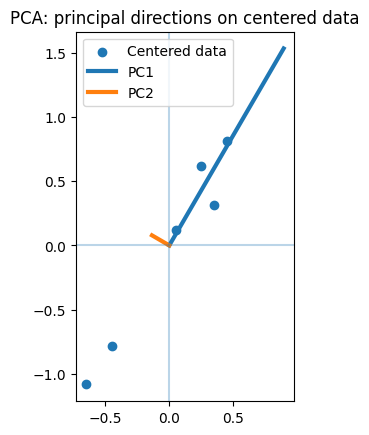

In [23]:
import matplotlib.pyplot as plt

plt.scatter(Xc[:,0], Xc[:,1], label="Centered data")
origin = np.array([[0,0],[0,0]])

# draw principal axes (scaled for display)
scale = 2*np.sqrt(eigvals)
axes = eigvecs * scale

plt.plot( [0, axes[0,0]], [0, axes[1,0]], label="PC1", linewidth=3 )
plt.plot( [0, axes[0,1]], [0, axes[1,1]], label="PC2", linewidth=3 )

plt.axhline(0, alpha=0.3); plt.axvline(0, alpha=0.3)
plt.gca().set_aspect('equal', 'box')
plt.legend(); plt.title("PCA: principal directions on centered data")
plt.show()


### Mini Exercise

1) Build a 3D dataset `X3` with 10 samples and clear correlation between features
   (e.g., make feature 3 ≈ feature 1 + small noise).
2) Center the data, compute covariance, eigenvalues/eigenvectors with `np.linalg.eigh`.
3) Report the **explained variance ratio**. How many PCs do you need for ≥95% EVR?
4) Project the data to the top 2 PCs and reconstruct (rank-2). Compare the reconstruction
   error `‖X_c - X_approx‖_F` (Frobenius norm).
